In [1]:
import matplotlib.pyplot as plt
import math
import tf_conversions
import numpy as np

g1 = tf_conversions.Frame(tf_conversions.Rotation.RotZ(math.radians(30)), tf_conversions.Vector(1,1,0))
g2 = tf_conversions.Frame(tf_conversions.Rotation.RotZ(math.radians(45)), tf_conversions.Vector(2,2,0))
p = tf_conversions.Frame(tf_conversions.Rotation.RotZ(math.radians(40)), tf_conversions.Vector(1.6,1.2,0))

In [2]:
g1_p = g1.Inverse() * p
g1_g2 = g1.Inverse() * g2

In [3]:
def proj_vector(base, projector):
    return np.sum(base * projector) * base / np.sum(base**2)

proj = proj_vector(np.array(list(g1_g2.p)), np.array(list(g1_p.p)))
projection_point = g1 * tf_conversions.Frame(tf_conversions.Rotation(), tf_conversions.Vector(proj[0], proj[1], 0))
print(proj)
print(projection_point)

[0.54641016 0.14641016 0.        ]
[[    0.866025,        -0.5,           0;
          0.5,    0.866025,           0;
            0,           0,           1]
[         1.4,         1.4,           0]]


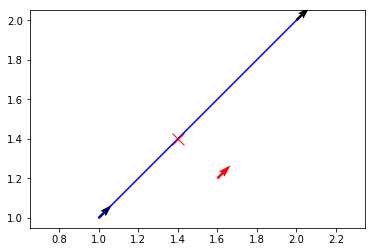

In [4]:
plt.quiver(g1.p.x(), g1.p.y(), g1.M[0,0], g1.M[1,1])
plt.quiver(g2.p.x(), g2.p.y(), g2.M[0,0], g2.M[1,1])
plt.quiver(p.p.x(), p.p.y(), p.M[0,0], p.M[1,1], color='red')
plt.plot([g1.p.x(),g2.p.x()], [g1.p.y(),g2.p.y()], 'b-')
plt.plot(projection_point.p.x(), projection_point.p.y(), 'rx', markersize=12)

plt.axis('equal')
plt.show()

In [5]:
def get_u(g1_g2, g1_p):
    return np.sum(g1_g2 * g1_p) / np.sum(g1_g2**2)

get_u(np.array(list(g1_g2.p)), np.array(list(g1_p.p)))

0.40000000000000013